In [12]:
import os

from IDRnD.utils import Train, seed_everything
from IDRnD.augmentations import ToMellSpec, PadOrClip, ToTensor, Normalize_predef
from IDRnD.dataset import Test_Dataset, get_train_data
from IDRnD.resnet import resnet18

import numpy as np
import pandas as pd
import librosa
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms

seed_everything(0)

In [2]:
dataset_dir = "."

eval_protocol_path = "protocol_test.txt"
eval_protocol = pd.read_csv(eval_protocol_path, sep=" ", header=None)
eval_protocol.columns = ['path', 'key']
eval_protocol['score'] = 0.0
eval_protocol['path'] = eval_protocol['path'].apply(lambda x: os.path.join(dataset_dir, x))

FileNotFoundError: [Errno 2] File b'protocol_test.txt' does not exist: b'protocol_test.txt'

In [13]:
post_transform = transforms.Compose([
    ToMellSpec(n_mels=128),
    Normalize_predef(-29.6179, 16.6342),
    librosa.power_to_db,
    PadOrClip(150),
    ToTensor(),
])

### predict

In [14]:
X, y = get_train_data()

In [16]:
test_dataset = Test_Dataset(X)

In [23]:
lens = [len(test_dataset[i][0]) for i in range(len(test_dataset))]

In [24]:
mda = pd.DataFrame()
mda["path"] = X
mda["lens"] = lens

In [31]:
pd.set_option('max_colwidth', 80)

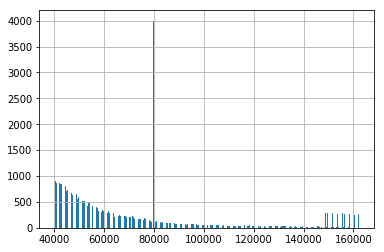

In [76]:
%matplotlib inline
mda["lens"].hist(bins = 500)

In [46]:
wavs = [test_dataset[i][0] for i in range(len(test_dataset))]

In [61]:
from hashlib import sha1

hashes = []
for wav in wavs:
    hashes.append(sha1(wav).hexdigest())

In [65]:
mda["hashes"]=hashes

In [75]:
mda.groupby("hashes")

In [81]:
len(set(hashes))

49408

In [85]:
from collections import Counter
common_hashes = [i[0] for i in Counter(hashes).most_common(592)]

In [40]:
set(mda["lens"])

{40320,
 40800,
 41280,
 41760,
 42240,
 42720,
 43200,
 43680,
 44160,
 44640,
 45120,
 45600,
 46080,
 46560,
 47040,
 47520,
 48000,
 48480,
 48960,
 49440,
 49920,
 50400,
 50880,
 51360,
 51840,
 52320,
 52800,
 53280,
 53760,
 54240,
 54720,
 55200,
 55680,
 56160,
 56640,
 57120,
 57600,
 58080,
 58560,
 59040,
 59520,
 60000,
 60480,
 60960,
 61440,
 61920,
 62400,
 62880,
 63360,
 63840,
 64320,
 64800,
 65280,
 65760,
 66240,
 66720,
 67200,
 67680,
 68160,
 68640,
 69120,
 69600,
 70080,
 70560,
 71040,
 71520,
 72000,
 72480,
 72960,
 73440,
 73920,
 74400,
 74880,
 75360,
 75840,
 76320,
 76800,
 77280,
 77760,
 78240,
 78720,
 79200,
 79680,
 80000,
 80160,
 80640,
 81120,
 81600,
 82080,
 82560,
 83040,
 83520,
 84000,
 84480,
 84960,
 85440,
 85920,
 86400,
 86880,
 87360,
 87840,
 88320,
 88800,
 89280,
 89760,
 90240,
 90720,
 91200,
 91680,
 92160,
 92640,
 93120,
 93600,
 94080,
 94560,
 95040,
 95520,
 96000,
 96480,
 96960,
 97440,
 97920,
 98400,
 98880,
 99360,


In [39]:
mda.sort_values("lens")[30000:]

,path,lens
18262,/src/workspace/data/files/Training_Data/spoof/spoof_07940.wav,67200
24605,/src/workspace/data/files/Training_Data/spoof/spoof_14283.wav,67200
49656,/src/workspace/data/files/Training_Data/spoof/spoof_39334.wav,67200
6390,/src/workspace/data/files/Training_Data/human/human_06390.wav,67200
46616,/src/workspace/data/files/Training_Data/spoof/spoof_36294.wav,67200
34585,/src/workspace/data/files/Training_Data/spoof/spoof_24263.wav,67200
20053,/src/workspace/data/files/Training_Data/spoof/spoof_09731.wav,67200
11676,/src/workspace/data/files/Training_Data/spoof/spoof_01354.wav,67200
18994,/src/workspace/data/files/Training_Data/spoof/spoof_08672.wav,67200
10891,/src/workspace/data/files/Training_Data/spoof/spoof_00569.wav,67200


In [7]:
hm = Train()

#test_dataset = Test_Dataset(eval_protocol["path"], post_transform)
test_dataset = Test_Dataset(X[:520], post_transform)

test_loader = DataLoader(test_dataset, batch_size=250, shuffle=False)

model = resnet18(num_classes=1).cuda()

#model.load_state_dict(torch.load('models/simple_old_conv.pt'))
#model_dst = torch.nn.DataParallel(model, device_ids=[0, 1]).cuda()
#torch.save(model_dst.module.state_dict(),  'models/kaggle2_nonparallel.pt') 
model.eval()
model.load_state_dict(torch.load('models/resnet_18_last_epoch.pt'))
pred = hm.predict_on_test(test_loader, model)

In [8]:
model(test_dataset[0][0].reshape(1, 1, 128, 150).cuda())

tensor([[1.9516e-06]], device='cuda:0', grad_fn=<SigmoidBackward>)

In [9]:
mda = pd.DataFrame()
mda["path"] = X[:520]

In [10]:
mda["score"] = pred.values

In [11]:
mda

,path,score
0,/src/workspace/data/files/Training_Data/human/...,3.746134e-06
1,/src/workspace/data/files/Training_Data/human/...,2.745747e-01
2,/src/workspace/data/files/Training_Data/human/...,7.009626e-12
3,/src/workspace/data/files/Training_Data/human/...,4.157010e-01
4,/src/workspace/data/files/Training_Data/human/...,2.967725e-01
5,/src/workspace/data/files/Training_Data/human/...,1.897165e-01
6,/src/workspace/data/files/Training_Data/human/...,4.357744e-01
7,/src/workspace/data/files/Training_Data/human/...,1.937179e-01
8,/src/workspace/data/files/Training_Data/human/...,4.595556e-01
9,/src/workspace/data/files/Training_Data/human/...,1.770746e-01


In [6]:
eval_protocol["score"] = pred.values
eval_protocol[['path', 'score']].to_csv('answers.csv', index=None)

NameError: name 'eval_protocol' is not defined

In [12]:
!jupyter nbconvert --to script predict.ipynb

[NbConvertApp] Converting notebook predict.ipynb to script
[NbConvertApp] Writing 1657 bytes to predict.py


In [ ]:
mda